In [13]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# Открываем собранный датасет
data = pd.read_parquet(os.path.join("..", "data", "parquet", "companies_feat_first_year.parquet"))

In [15]:
# Избавляемся от NaNs
data = data.dropna()

data = data.drop(
    ["Наименование / ФИО", "ОГРН", "ИНН"],
    axis=1,
    errors="ignore",
)

# Изменяем некоторые колонки для удобства
for col in ["Основной вид деятельности", "Регион"]:
    data[col] = data[col].apply(lambda x: x[1:2] if x[0] == "0" else x[:2])

# Поменяем тип данных
category_mappings = {
    "Тип субъекта": {"Индивидуальный предприниматель": 1},
    "Вновь созданный": {"Да": 1},
    "Наличие лицензий": {"Да": 1},
}
for col, mapping in category_mappings.items():
    data[col] = data[col].map(mapping).fillna(0).astype(int)

data["КатСубМСП"] = data["КатСубМСП"].astype(int)

In [16]:
# Признаки делятся на 2 типа - признаки компании и признаки региона
data.keys()

Index(['Тип субъекта', 'Основной вид деятельности', 'Регион',
       'Вновь созданный', 'Наличие лицензий', 'reg_date', 'lifetime', '16.5.',
       '16.11.', '16.12.', '19.13.', '14.3.2.', '14.4.2.', '15.2.', '1.1.',
       '1.3.', '1.5.', '1.6.2.', '1.10.', '1.19.', '1.20.', '3.1.1.', '3.1.2.',
       '3.2.', '3.8.2.', '3.9.', '3.15.', '3.17.', '3.28.', '11.1.', '11.3.',
       '11.4.', '11.5.1', '11.5.2.', '9.3.', '2.1.', '2.2.', '2.3.', '2.4.',
       '2.5.', '2.10.1.', '5.2.', '20.4.', '20.5.', '20.13.', '4.12.', '4.16.',
       '4.21.', 'КатСубМСП', 'ССЧР'],
      dtype='object')

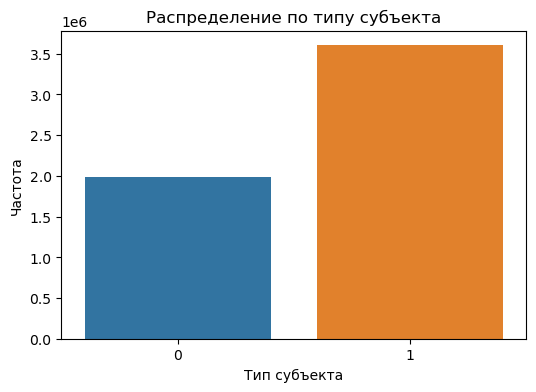

In [18]:
# Посмотрим распределение Типов Субъекта
plt.figure(figsize=(6, 4))
sns.countplot(x="Тип субъекта", data=data)
plt.title("Распределение по типу субъекта")
plt.xlabel("Тип субъекта")
plt.ylabel("Частота")
plt.show()

count                          5582489
mean     2014-12-27 07:33:03.172812032
min                2002-07-01 00:00:00
25%                2012-08-10 00:00:00
50%                2016-08-10 00:00:00
75%                2018-07-10 00:00:00
max                2023-02-10 00:00:00
Name: reg_date, dtype: object


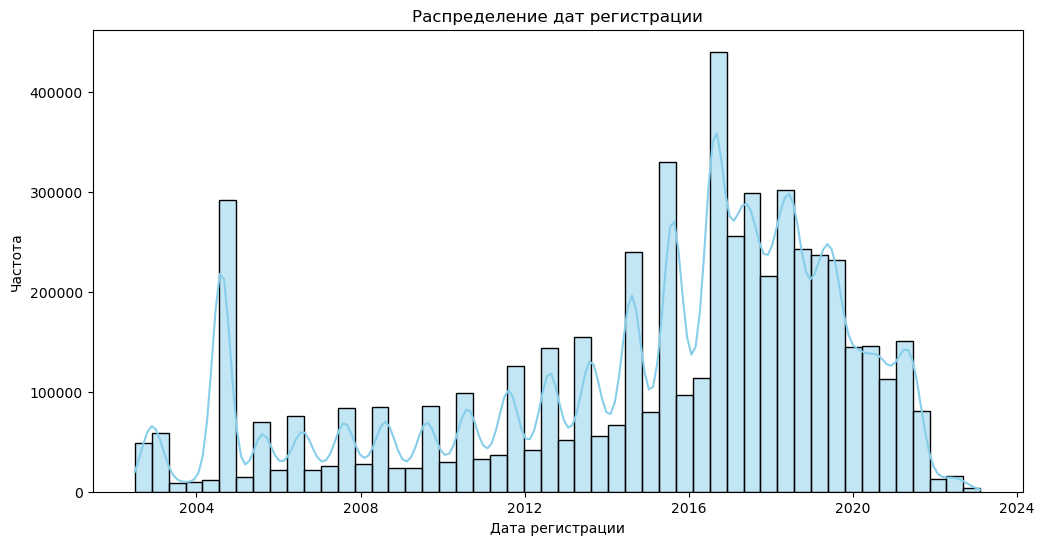

In [19]:
# Посмотрим распределение времени регистрации компаний
print(data.reg_date.describe())
plt.figure(figsize=(12, 6))
sns.histplot(data["reg_date"], kde=True, bins=50, color="skyblue")
plt.title("Распределение дат регистрации")
plt.xlabel("Дата регистрации")
plt.ylabel("Частота")
plt.show()

count    5582489.00
mean          60.57
std           57.04
min            1.00
25%           17.00
50%           37.00
75%           88.00
max          248.00
Name: lifetime, dtype: float64


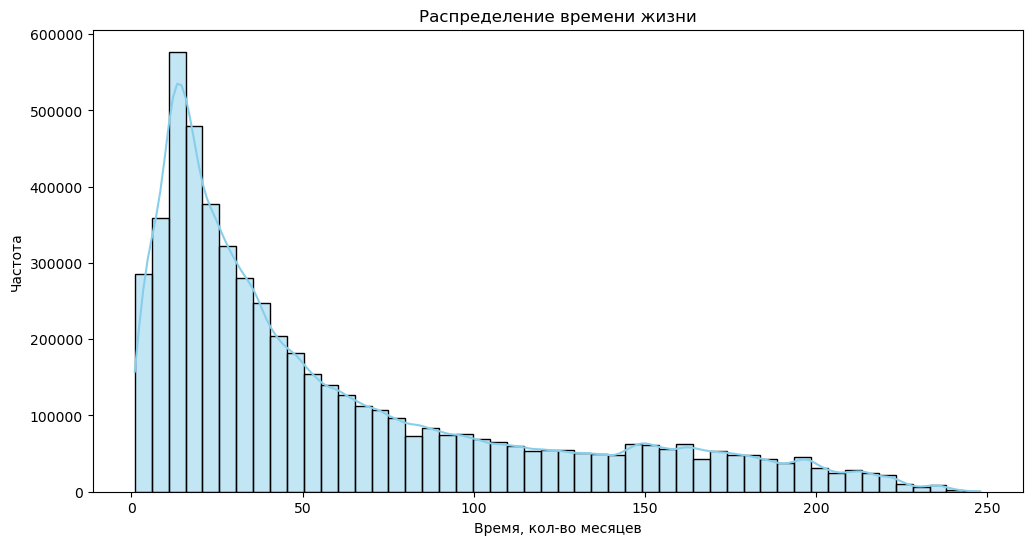

In [20]:
# Посмотрим распределение времени жизни компаний
print(data["lifetime"].describe().round(2))
plt.figure(figsize=(12, 6))
sns.histplot(data["lifetime"], kde=True, bins=50, color="skyblue")
plt.title("Распределение времени жизни")
plt.xlabel("Время, кол-во месяцев")
plt.ylabel("Частота")
plt.show()

Text(0.5, 1.0, 'Время жизни компании')

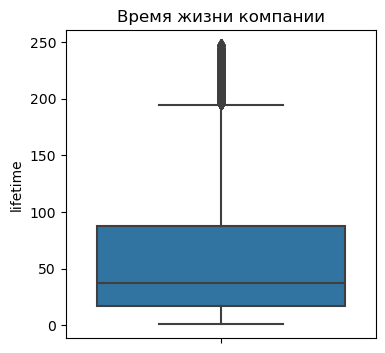

In [21]:
# Боксплот
plt.figure(figsize=(4, 4))
sns.boxplot(y=data["lifetime"])
plt.title("Время жизни компании")

In [22]:
data.replace(to_replace='Индивидуальный предприниматель', value=0).replace(to_replace='Юридическое лицо', value=1)

,Тип субъекта,Основной вид деятельности,Регион,Вновь созданный,Наличие лицензий,reg_date,lifetime,16.5.,16.11.,16.12.,...,2.10.1.,5.2.,20.4.,20.5.,20.13.,4.12.,4.16.,4.21.,КатСубМСП,ССЧР
5,1,47,56,1,0,2023-02-10,1.0,2270.796520,99.000000,73.535990,...,4.7,131.236140,111.9,109.4,108.5,2.2,9.4,8.0,1,1.0
19,1,46,66,0,0,2023-02-10,1.0,11807.154701,84.000000,64.785328,...,4.1,111.626093,108.7,109.8,112.1,3.9,20.7,23.4,1,1.0
25,1,47,50,1,0,2023-02-10,1.0,13141.611496,122.000000,59.209003,...,3.4,138.782008,110.6,112.1,107.4,5.5,19.9,15.1,1,1.0
28,1,47,66,0,0,2023-02-10,1.0,11807.154701,84.000000,64.785328,...,4.1,111.626093,108.7,109.8,112.1,3.9,20.7,23.4,1,1.0
31,1,71,77,0,0,2023-02-10,1.0,8388.165716,94.000000,67.345403,...,2.6,157.451290,109.0,106.8,114.9,4.9,33.3,157.7,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460355,0,80,60,0,0,2002-07-02,213.0,450.000000,95.238095,138.200000,...,10.2,78.200000,117.9,108.4,107.2,4.4,2.8,1.9,2,1.0
6460356,0,69,77,0,0,2002-07-02,230.0,2390.000000,77.787561,82.600000,...,2.1,98.000000,120.1,114.7,131.1,28.5,32.1,140.2,1,1.0
6460357,0,86,77,0,0,2002-07-02,233.0,2390.000000,77.787561,82.600000,...,2.1,98.000000,120.1,114.7,131.1,28.5,32.1,140.2,2,1.0
6460358,0,70,77,0,0,2002-07-02,194.0,2390.000000,77.787561,82.600000,...,2.1,98.000000,120.1,114.7,131.1,28.5,32.1,140.2,1,1.0


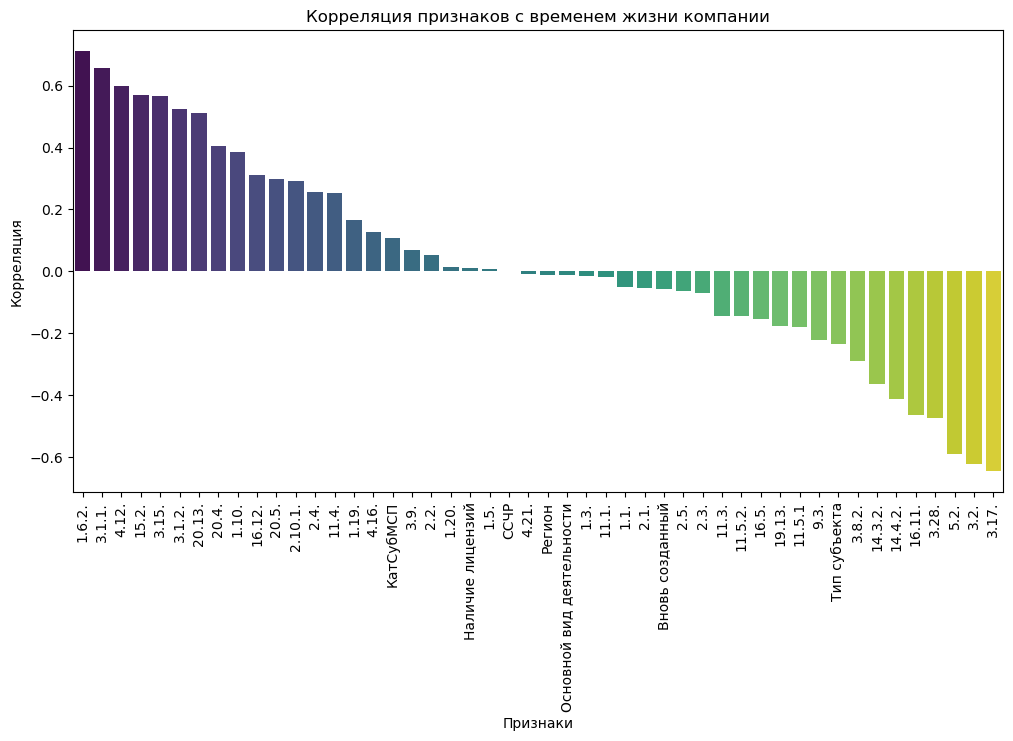

In [23]:
# Корреляции
correlation_results = data.drop(
    ["reg_date", ], axis=1
).replace(to_replace='Индивидуальный предприниматель', value=0).replace(to_replace='Юридическое лицо', value=1).corrwith(data.lifetime)
sorted_correlation_results = correlation_results.sort_values(ascending=False)
sorted_correlation_results.drop("lifetime", inplace=True)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_correlation_results.index,
    y=sorted_correlation_results.values,
    palette="viridis",
)
plt.title("Корреляция признаков с временем жизни компании")
plt.xlabel("Признаки")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()

In [24]:
# Зависимость от "Тип субъекта"

data["lifetime"].groupby(data["Тип субъекта"]).mean()

Тип субъекта
0    78.697830
1    50.610305
Name: lifetime, dtype: float64

In [25]:
dependency_df = (
    (data["lifetime"].groupby(data["Основной вид деятельности"]).mean())
    .sort_values()
    .to_frame()
)
dependency_df["Количество компаний"] = (
    data.groupby("Основной вид деятельности").size().loc[dependency_df.index].values
)
dependency_df

,lifetime,Количество компаний
Основной вид деятельности,,
39,28.807453,161
98,36.410000,100
53,37.411250,8569
12,38.990909,220
55,39.070116,34871
...,...,...
6,98.258621,522
58,99.093993,9405
21,99.637954,743


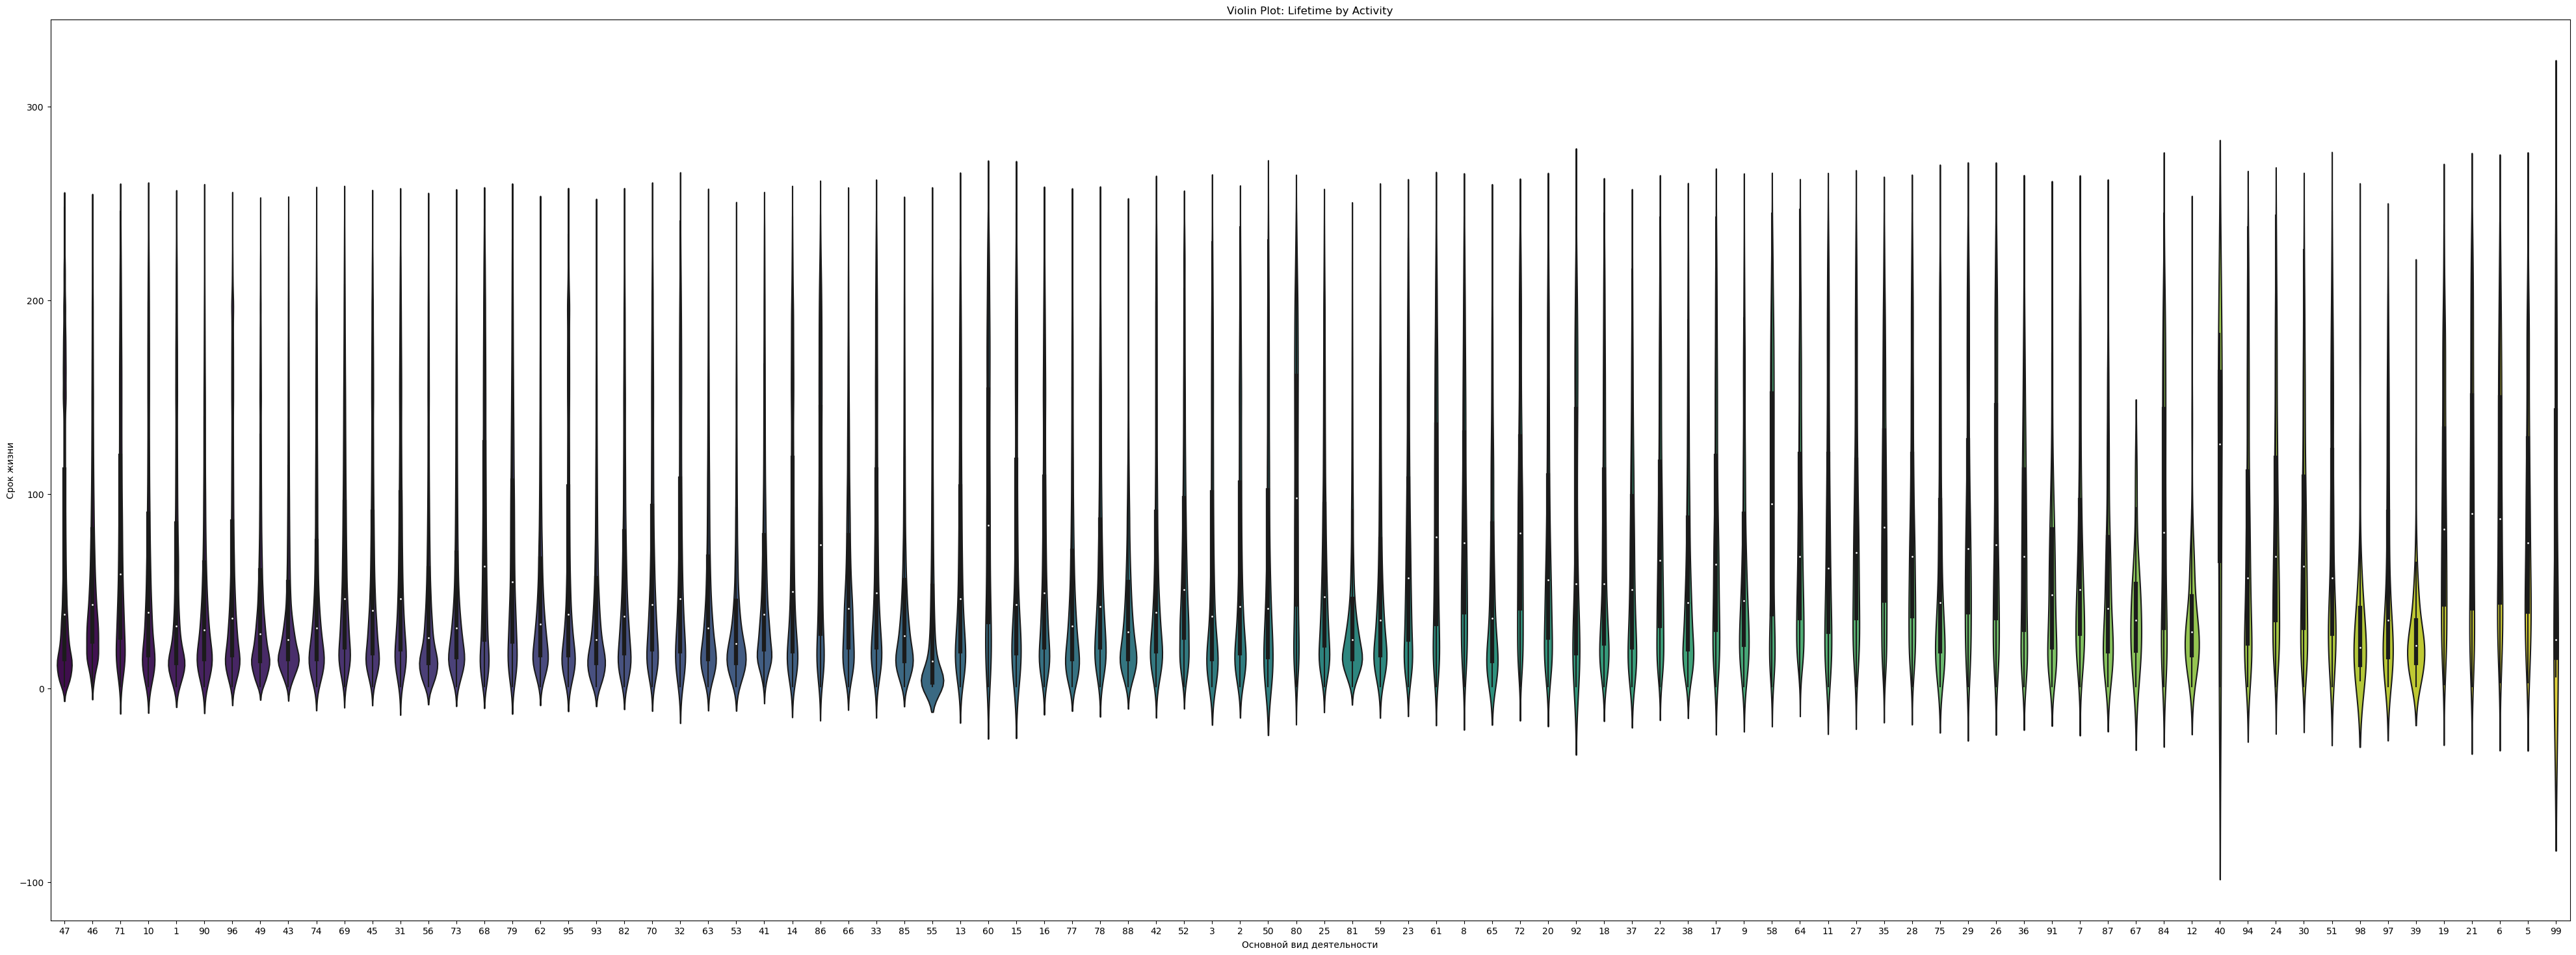

In [26]:
plt.figure(figsize=(50, 18))
sns.violinplot(
    x="Основной вид деятельности", y="lifetime", data=data, palette="viridis"
)
plt.title("Violin Plot: Lifetime by Activity")
plt.xlabel("Основной вид деятельности")
plt.ylabel("Срок жизни")
plt.show()

In [27]:

# np.linspace(mdates.date2num(data[col]).min(), mdates.date2num(data[col]).max(), 8)
labels_t = pd.date_range(start=data[col].min(),end=data[col].max(),periods=8)
labels_t = ["-".join([str(labels_t[i].year), str(labels_t[i].month), str(labels_t[i].day)]) for i in range(len(labels_t))]

<Figure size 1000x800 with 0 Axes>

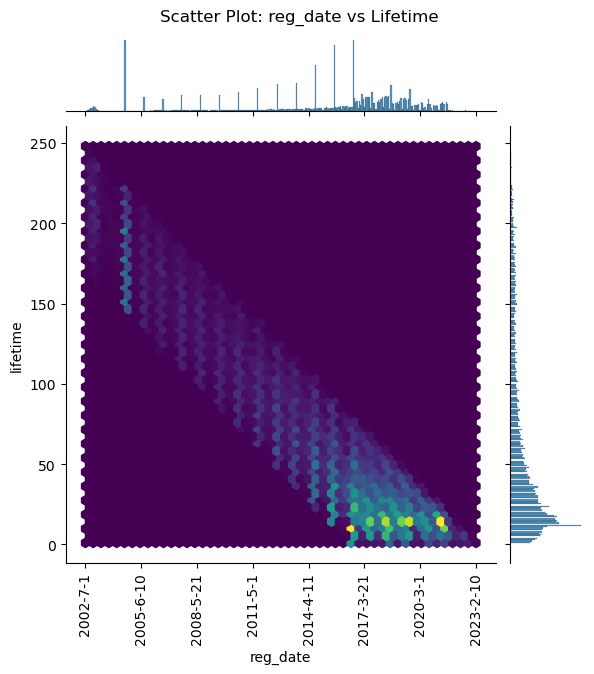

In [29]:
import matplotlib.dates as mdates

# Зависимость от даты регистрации компании
col = "reg_date"

plt.figure(figsize=(10, 8))
data_numeric = data.copy()
data_numeric[col] = mdates.date2num(data[col])
sns.jointplot(x=col, y="lifetime", data=data_numeric, kind="hex", cmap="viridis")
plt.suptitle(f"Scatter Plot: {col} vs Lifetime", y=1.02)
labels_t = pd.date_range(start=data[col].min(),end=data[col].max(),periods=8)
labels_t = ["-".join([str(labels_t[i].year), str(labels_t[i].month), str(labels_t[i].day)]) for i in range(len(labels_t))]
plt.xticks(ticks=np.linspace(mdates.date2num(data[col]).min(), mdates.date2num(data[col]).max(), 8), labels=labels_t, rotation=90)
# plt.xticks_

plt.show()

In [30]:
# Зависимость времени жизни от "Тип субъекта"

dependency_df2 = (
    (data["lifetime"].groupby(data["Регион"]).mean()).sort_values().to_frame()
)
dependency_df2["Количество компаний"] = (
    data.groupby("Регион").size().loc[dependency_df2.index].values
)
dependency_df2

,lifetime,Количество компаний
Регион,,
91,16.787721,43523
92,21.815440,7824
20,22.558853,21197
6,30.587595,7255
5,44.809041,52006
...,...,...
43,70.926536,46104
29,71.305054,35102
51,72.472108,24344
